# 🖥️ Cuaderno para la creación del dataset del modelo

El objetivo principal de este cuaderno es crear el dataset que utilizará nuestro modelo, de forma que, al recibir la imagen de un componente, pueda identificar correctamente qué tipo de componente es.

**Tercera parte: dataset final**

## Importaciones

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image 
from PIL import ImageOps
import os

## Obtención de datos

Cogemos el dataset resultante del cuaderno anterior.

In [2]:
df_data = pd.read_csv('./data/processed/components_01_with_local_paths.csv')

## Descripción de los datos

Este dataset contiene **9982 registros**. Disponemos del **tipo de componente** (`label`), que será el *target* de nuestro modelo inicial, así como la URL de la imagen y la ruta local, aunque mantiene fallos por temas de barras, que ahora arreglaremos.

| #  | Columnas           | Non-Null Count | Tipos |
|----|-----------------|----------------|-------|
| 0  | image_url        | 9982           | str   |
| 1  | label            | 9982           | str   |
| 2  | local_image_path | 9971           | str   |



In [3]:
df_data

,image_url,label,local_image_path
0,https://thumb.pccomponentes.com/w-530-530/arti...,motherboard,../data/images\motherboard_0.jpg
1,https://thumb.pccomponentes.com/w-530-530/arti...,motherboard,../data/images\motherboard_1.jpg
2,https://thumb.pccomponentes.com/w-530-530/arti...,motherboard,../data/images\motherboard_2.jpg
3,https://thumb.pccomponentes.com/w-530-530/arti...,motherboard,../data/images\motherboard_3.jpg
4,https://thumb.pccomponentes.com/w-530-530/arti...,motherboard,../data/images\motherboard_4.jpg
...,...,...,...
9977,https://cdna.pcpartpicker.com/static/forever/i...,hard_drive,../data/images\hard_drive_9977.jpg
9978,https://cdna.pcpartpicker.com/static/forever/i...,hard_drive,../data/images\hard_drive_9978.jpg
9979,https://cdna.pcpartpicker.com/static/forever/i...,hard_drive,../data/images\hard_drive_9979.jpg
9980,https://m.media-amazon.com/images/I/31s-wKnYDv...,hard_drive,../data/images\hard_drive_9980.jpg


In [4]:
df_data.info()

<class 'pandas.DataFrame'>
RangeIndex: 9982 entries, 0 to 9981
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   image_url         9982 non-null   str  
 1   label             9982 non-null   str  
 2   local_image_path  9971 non-null   str  
dtypes: str(3)
memory usage: 234.1 KB


## Preparación de los datos para los algoritmos

En este apartado vamos a preparar el dataset para dejarlo listo para el modelo que elijamos.

### Optimizar las imágenes

En este apartado se hará que todas las imágenes tengan la misma proporción y las vetorizaremos.


In [13]:
target_size = (530, 530)

data = []

for idx, row in df_data.iterrows():
    path = row["local_image_path"]
    label = row["label"]
    
    img = Image.open(path).convert("RGB")
    img_resized = ImageOps.fit(img, target_size, Image.Resampling.LANCZOS)
    img_vector = np.array(img_resized).flatten()
    
    data.append([label, img_vector])

df_vector = pd.DataFrame(data, columns=["label", "image"])


In [14]:
df_vector.info()

<class 'pandas.DataFrame'>
RangeIndex: 9971 entries, 0 to 9970
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   9971 non-null   str   
 1   image   9971 non-null   object
dtypes: object(1), str(1)
memory usage: 155.9+ KB


In [15]:
df_vector

,label,image
0,motherboard,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ..."
1,motherboard,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ..."
2,motherboard,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ..."
3,motherboard,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ..."
4,motherboard,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ..."
...,...,...
9966,hard_drive,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ..."
9967,hard_drive,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ..."
9968,hard_drive,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ..."
9969,hard_drive,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ..."


Si probamos con una imagen, por ejemplo este procesador, podemos ver que la imagen se guarda perfectamente.


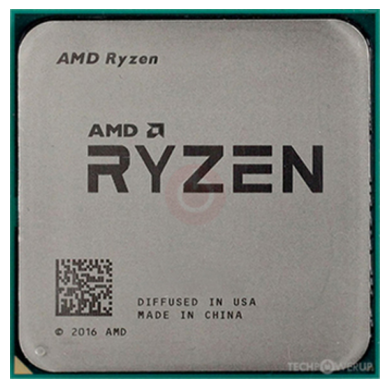

In [16]:
vector = df_vector["image"].iloc[9120]
img_array = np.array(vector, dtype=np.uint8).reshape((530, 530, 3))

plt.imshow(img_array)
plt.axis('off')
plt.show()

## Transformar la etiqueta a números

Para que sea más eficiente, transforma la columna `label` a números.

| Número | Componente       |
|--------|-----------------|
| 0      | motherboard     |
| 1      | gpu             |
| 2      | cpu             |
| 3      | hard_drive      |
| 4      | ram             |
| 5      | pc_case         |
| 6      | power_supply    |
| 7      | liquid_cooling  |
| 8      | case_fan        |
| 9      | cpu_fan         |
| 10     | sound_card      |


In [17]:
df_vector["label_num"], label_mapping = pd.factorize(df_vector["label"])
label_map = {i: name for i, name in enumerate(label_mapping)}

print(label_map)


{0: 'motherboard', 1: 'gpu', 2: 'cpu', 3: 'hard_drive', 4: 'ram', 5: 'pc_case', 6: 'power_supply', 7: 'liquid_cooling', 8: 'case_fan', 9: 'cpu_fan', 10: 'sound_card'}


In [18]:
df_vector.info()

<class 'pandas.DataFrame'>
RangeIndex: 9971 entries, 0 to 9970
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      9971 non-null   str   
 1   image      9971 non-null   object
 2   label_num  9971 non-null   int64 
dtypes: int64(1), object(1), str(1)
memory usage: 233.8+ KB


Ahora se borrará el label original y se cambiará el nombre al numérico.


In [19]:
df_vector = df_vector.drop(columns=["label"])
df_vector = df_vector.rename(columns={"label_num": "label"})

In [20]:
df_vector.info()
df_vector

<class 'pandas.DataFrame'>
RangeIndex: 9971 entries, 0 to 9970
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   9971 non-null   object
 1   label   9971 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 155.9+ KB


,image,label
0,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...",0
1,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...",0
2,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...",0
3,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...",0
4,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...",0
...,...,...
9966,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...",3
9967,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...",3
9968,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...",3
9969,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...",3


## Normalización de las imágenes

En este apartado se normalizan los valores de los píxeles para que estén en el rango $[0, 1]$, lo cual es una práctica estándar antes de entrenar modelos de aprendizaje automático, especialmente redes neuronales.

Originalmente, las imágenes están representadas en formato RGB con valores enteros entre **0 y 255**. Para normalizarlas, se divide cada valor entre 255.


In [21]:
# batch_size = 100

# for start in range(0, len(df_vector), batch_size):
#     end = min(start + batch_size, len(df_vector))
#     for i in range(start, end):
#         df_vector.at[i, "image"] = df_vector.at[i, "image"].astype(np.float32) / 255.0

In [22]:
df_vector

,image,label
0,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...",0
1,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...",0
2,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...",0
3,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...",0
4,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...",0
...,...,...
9966,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...",3
9967,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...",3
9968,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...",3
9969,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...",3


## Guardamos el dataset

A continuación guardamos el dataset final en un archivo CSV para poder usarlo en otros cuadernos.

In [23]:
df_vector.to_csv("dataset_vectorized.csv", index=False)

In [ ]:
df_vector.info()
df_vector

,image,label
0,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...",0
1,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...",0
2,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...",0
3,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...",0
4,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...",0
...,...,...
9966,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...",3
9967,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...",3
9968,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...",3
9969,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...",3


## Conclusiones

Hemos preparado un dataset que contiene **la etiqueta `label`** de cada componente y la **imagen vectorizada `image`**.

Con este dataset ya podríamos trabajar con los modelos.
